# Coordinate systems and transforms of Synthesis AI face dataset

At first, we install some dependencies.

Installing `face_api_dataset` from the github it it's not already installed.

In [1]:
%%bash
curl -o "setup.sh" https://raw.githubusercontent.com/Synthesis-AI-Dev/face_api_dataset_examples/main/setup.sh
chmod a+x setup.sh
./setup.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1281  100  1281    0     0   3284      0 --:--:-- --:--:-- --:--:--  3379
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   241  100   241    0     0    656      0 --:--:-- --:--:-- --:--:--   675


  Cloning https://github.com/Synthesis-AI-Dev/face_api_dataset.git (to revision 058ebef3) to /private/var/folders/4h/2fr255s9115drx7nckt7bb6m0000gp/T/tmp.kwiiMqHx/pip-req-build-79h8e1p6


  Running command git clone -q https://github.com/Synthesis-AI-Dev/face_api_dataset.git /private/var/folders/4h/2fr255s9115drx7nckt7bb6m0000gp/T/tmp.kwiiMqHx/pip-req-build-79h8e1p6
  Running command git checkout -q 058ebef3


  Resolved https://github.com/Synthesis-AI-Dev/face_api_dataset.git to commit 058ebef3
git lfs is already installed


Cloning into 'face_api_dataset_examples'...
Filtering content: 100% (705/705), 300.15 MiB | 2.28 MiB/s, done.


Finally we add some imports for the visualisation.

In [2]:
import cv2
%matplotlib inline

In [3]:
import numpy as np

We use `FaceApiDataset` class to access synthesis datasets.


In [4]:
from face_api_dataset import FaceApiDataset, Modality

**Warning!** Some of modalities requires additional libraries to be installed:
`SEGMENTS` and `RGB` modalities use `opencv-python` library,
 while `DEPTH`, `ALPHA` and `NORMALS` modalities
 use `tiffile`  and `imagecodecs` libraries for effective work with floating point tiff files.
 If dataset with these modalities will be created without corresponding libraries present, an `ImportError` is raised.


In [5]:
data_root = "test_dataset"
dataset = FaceApiDataset(data_root,
                        modalities=[Modality.RGB, Modality.CAM_TO_HEAD, Modality.HEAD_TO_CAM,
                                    Modality.WORLD_TO_HEAD, Modality.HEAD_TO_WORLD, Modality.WORLD_TO_CAM,
                                    Modality.CAM_TO_WORLD, Modality.LANDMARKS_3D_IBUG68
                                   ])

In [6]:
len(dataset)

660

There are 13 items in the test dataset. Let's explore them closer.

In [7]:
item = dataset[0]
item2 = dataset[1]

Each item is a dict with different modalities as keys.

In [8]:
print(item.keys())

dict_keys([<Modality.RGB: 2>, <Modality.LANDMARKS_3D_IBUG68: 13>, <Modality.HEAD_TO_CAM: 27>, <Modality.CAM_TO_HEAD: 28>, <Modality.HEAD_TO_WORLD: 29>, <Modality.WORLD_TO_HEAD: 30>, <Modality.CAM_TO_WORLD: 31>, <Modality.WORLD_TO_CAM: 32>])


In Synthesis AI face dataset we use 3 different coordinate systems:
1.  World coordinate system.
2.  Camera coordinate system, centered at the camera with x-axis directed right, y-axis directed top and z-axis directed towards the camera.
3.  Face coordinate system, centered at the center of the face with x-axis directed toward the left ear, y-axis directed to the top of the head and z-axis directed towards the nose.

We provide transformations between head, camera and world coordinates systems as 4x4 matrices in homogeneous coordinates.

In [9]:
item[Modality.CAM_TO_HEAD]

array([[ 0.75588956,  0.65426297, -0.02387002,  0.01679011],
       [-0.64273075,  0.73463744, -0.21726866, -0.24743117],
       [-0.12461539,  0.17957326,  0.97581983,  0.98591779],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [10]:
item[Modality.HEAD_TO_CAM]

array([[ 0.75588965, -0.6427294 , -0.12461507, -0.04886255],
       [ 0.65426463,  0.73463768,  0.17957316, -0.0062573 ],
       [-0.02387013, -0.21726885,  0.97582   , -1.0154366 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [11]:
item[Modality.HEAD_TO_WORLD]

array([[ 0.75588965, -0.6427294 , -0.12461507, -0.048654  ],
       [ 0.65426463,  0.73463768,  0.17957316,  1.53290212],
       [-0.02387013, -0.21726885,  0.97582   ,  0.04881744],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
item[Modality.WORLD_TO_HEAD]

array([[ 0.75588956,  0.65426297, -0.02387002, -0.96497877],
       [-0.64273075,  0.73463744, -0.21726866, -1.14679221],
       [-0.12461539,  0.17957326,  0.97581983, -0.32896829],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [13]:
item[Modality.CAM_TO_WORLD]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.08545360e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.53915942e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.06425405e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [14]:
item[Modality.WORLD_TO_CAM]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.08545360e-04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -1.53915942e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        -1.06425405e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

X_TO_Y transform is always inverse of Y_TO_X:

In [15]:
np.testing.assert_allclose(item[Modality.CAM_TO_HEAD] @ item[Modality.HEAD_TO_CAM], np.eye(4), atol=1e-10)
np.testing.assert_allclose(item[Modality.HEAD_TO_WORLD] @ item[Modality.WORLD_TO_HEAD], np.eye(4), atol=1e-10)
np.testing.assert_allclose(item[Modality.CAM_TO_WORLD] @ item[Modality.WORLD_TO_CAM], np.eye(4), atol=1e-10)

And composition of X_TO_Y and Z_TO_X transforms always give Z_TO_Y transform:

In [16]:
np.testing.assert_allclose(item[Modality.CAM_TO_WORLD], item[Modality.HEAD_TO_WORLD] @ item[Modality.CAM_TO_HEAD], atol=1e-10)


All 3D coordinates (ex. landmarks) are always given in camera coordinates.

In [17]:
item[Modality.LANDMARKS_3D_IBUG68][0]

(-0.09892016649246216, -0.06459903717041016, -1.055171012878418)

If we want to get coordinates in the face coordinate system (they should be independent on camera position and pitch/yaw/roll values),
we need to multiply them by CAM_TO_HEAD transform.

However, as matrices are in homogeneous coordinates, first we will need to transform them to homogeneous coordinates:

In [18]:
def to_homogeneous(xs):
    xs_array = np.array(xs)
    assert (xs_array.shape[-1] == 3)
    ones_shape = list(xs_array.shape)
    ones_shape[-1] = 1
    homogeneous = np.concatenate([xs_array, np.ones(ones_shape)], axis=-1)
    return homogeneous

In [19]:
homogeneous_cam = to_homogeneous(item[Modality.LANDMARKS_3D_IBUG68][0])
homogeneous_cam

array([-0.09892017, -0.06459904, -1.05517101,  1.        ])

We wrote our own function instead of using opecv one, so it can work with multidimensional arrays of points.
Opencv function can work only with 1-d arrays of points, neither single point, nor multidimensional arrays are supported.
In this particular case, opencv function will suffice:

In [20]:
cv2.convertPointsToHomogeneous(np.array([item[Modality.LANDMARKS_3D_IBUG68][0]]))[0]

array([[-0.09892017, -0.06459904, -1.05517101,  1.        ]])

Now, we can compute homogeneous coordinates in head coordinate system.

In [21]:
homogeneous_head = item[Modality.CAM_TO_HEAD] @ homogeneous_cam
homogeneous_head

array([-0.07506041, -0.00205342, -0.04301229,  1.        ])

Now, we need to transform back to euclidian coordinates:

In [22]:
def from_homogeneous(xs):
    xs_array = np.array(xs)
    assert (xs_array.shape[-1] == 4)

    slice_but_last = list(xs_array.shape)
    slice_but_last[-1] = slice(None, -1)
    slice_but_last = tuple(slice_but_last)

    slice_last = list(xs_array.shape)
    slice_last[-1] = slice(-1, None)
    slice_last = tuple(slice_last)

    return xs_array[slice_but_last] / xs_array[slice_last]

And we can compute euclidian coordinates in the head space as:

In [23]:
from_homogeneous(homogeneous_head)

array([-0.07506041, -0.00205342, -0.04301229])

Once again, we can use opencv convertion function:

In [24]:
cv2.convertPointsFromHomogeneous(np.array([homogeneous_head]))[0]

array([[-0.07506041, -0.00205342, -0.04301229]])

We can use these transforms to estimate pitch/yaw/roll values (rotation of the head, relative to the world).

In [25]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


In [26]:
def get_yaw_pitch_roll_world(item):
    rotation = R.from_matrix(item[Modality.WORLD_TO_HEAD][:3,:3])

    # We multiply resulting angles by [-1, 1, -1] to use the same positive axis
    # as in job generaton json.
    yaw, pitch, roll = rotation.as_euler("YXZ", degrees=True) * [-1, 1,-1]
    return yaw, pitch, roll

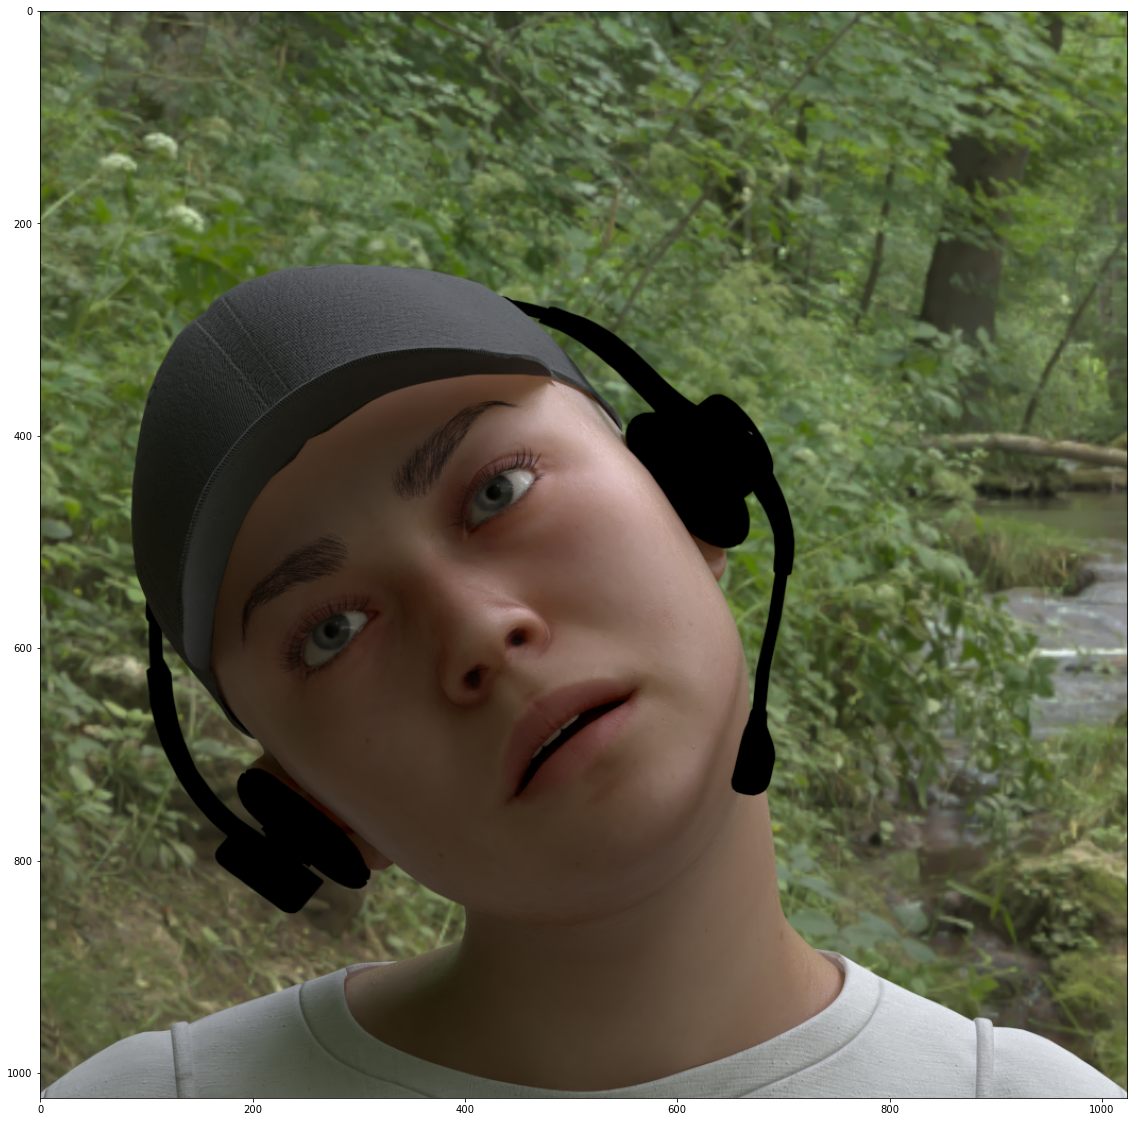

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(item[Modality.RGB]);

In [28]:
get_yaw_pitch_roll_world(item)

(1.4012577087406348, 12.548666261673763, 41.182486428142724)

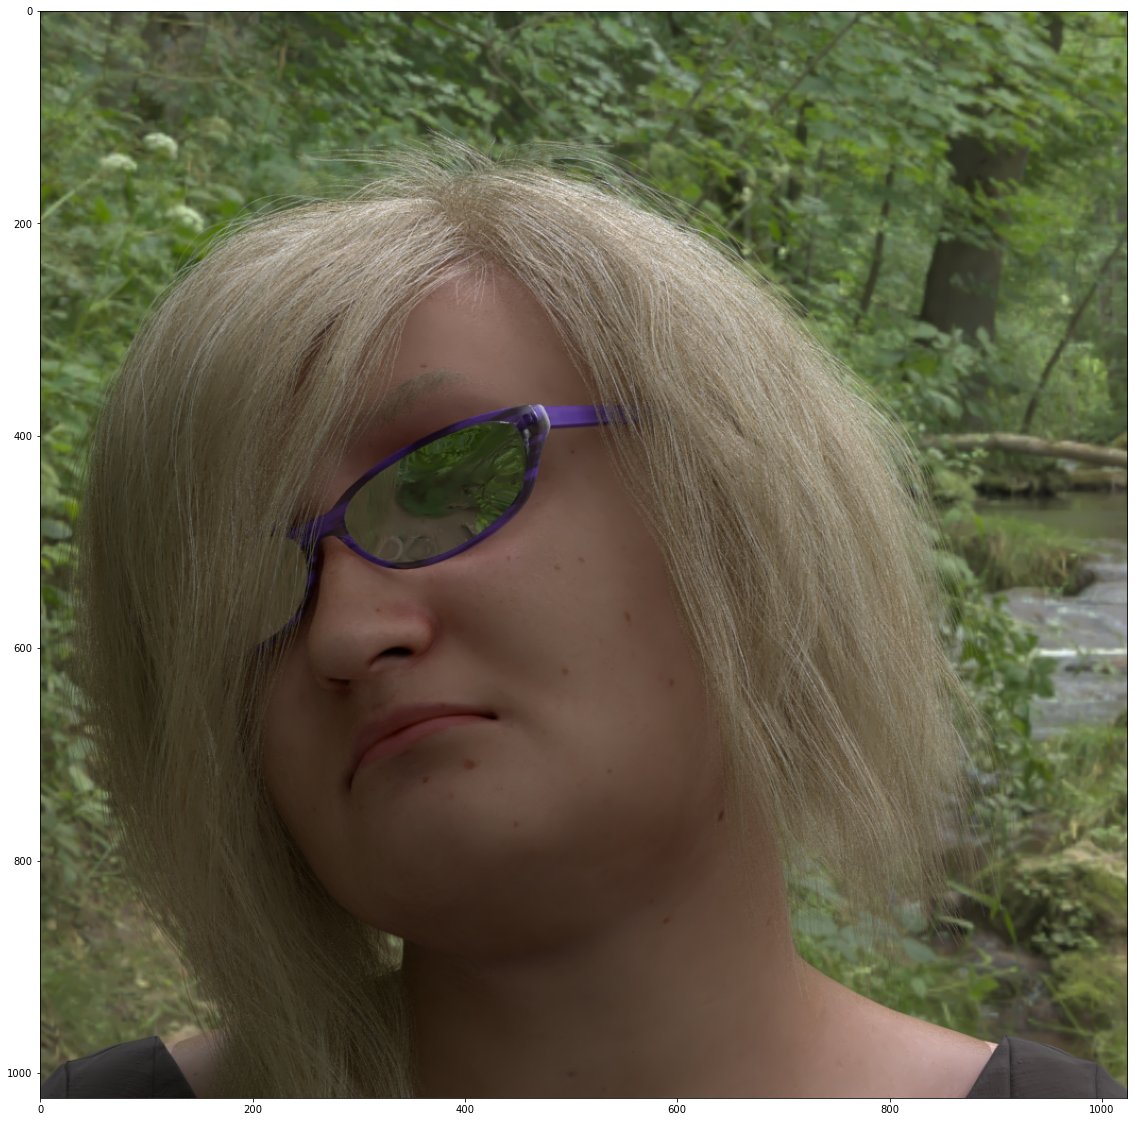

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(item2[Modality.RGB]);

In [30]:
get_yaw_pitch_roll_world(item2)


(-22.543494499227936, 16.186159311289398, 18.925839883529903)